In [10]:
#Chapter 3. Classification


#In Chapter 1 I mentioned that the most common supervised learning 
#tasks are regression (predicting values) and classification (predicting
#classes). In Chapter 2 we explored a regression task, predicting
#housing values, using various algorithms such as linear regression, 
#decision trees, and random forests (which will be explained in further
#detail in later chapters). Now we will turn our attention to 
#classification systems.

#MNIST
#In this chapter we will be using the MNIST dataset, which is 
#a set of 70,000 small images of digits handwritten by high 
#school students and employees of the US Census Bureau. Each 
#image is labeled with the digit it represents. This set has
#been studied so much that it is often called the “hello world” 
#of machine learning: whenever people come up with a new classification
#algorithm they are curious to see how it will perform on MNIST,
#and anyone who learns machine learning tackles this dataset sooner 
#or later.
    

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
    
    
type(mnist)

sklearn.utils._bunch.Bunch

In [11]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [13]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
#The fetch_openml() function is a bit unusual since by default it 
#returns the inputs as a Pandas DataFrame and the labels as a 
#Pandas Series (unless the dataset is sparse). But the MNIST 
#dataset contains images, and DataFrames aren’t ideal for that, 
#so it’s preferable to set as_frame=False to get the data as NumPy 
#arrays instead. Let’s look at these arrays:


X, y = mnist.data, mnist.target

X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X.shape

(70000, 784)

In [16]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [17]:
y.shape

(70000,)

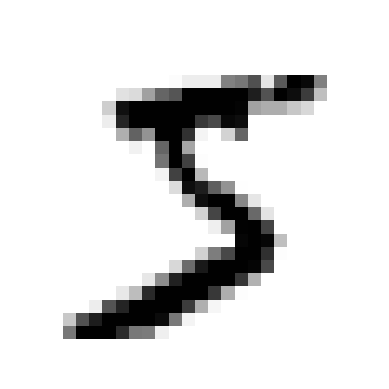

In [18]:
#There are 70,000 images, and each image has 784 features. This 
#is because each image is 28 × 28 pixels, and each feature simply 
#represents one pixel’s intensity, from 0 (white) to 255 (black). 
#Let’s take a peek at one digit from the dataset (Figure 3-1). All 
#we need to do is grab an instance’s feature vector, reshape it to 
#a 28 × 28 array, and display it using Matplotlib’s imshow() 
#function. We use cmap="binary" to get a grayscale color map where
#0 is white and 255 is black:


import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

some_digit = X[0]
plot_digit(some_digit)


In [19]:
y[0]

'5'

In [20]:
#But wait! You should always create a test set and set it aside 
#before inspecting the data closely. The MNIST dataset returned by
#fetch_openml() is actually already split into a training set (the 
#first 60,000 images) and a test set (the last 10,000 images):


X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
X[:4].shape

(4, 784)

In [22]:
y[:4].shape

(4,)

In [23]:
y[:4]

array(['5', '0', '4', '1'], dtype=object)

In [24]:
#The training set is already shuffled for us, which is good 
#because this guarantees that all cross-validation folds will 
#be similar (we don’t want one fold to be missing some digits).
#Moreover, some learning algorithms are sensitive to the order of
#the training instances, and they perform poorly if they get many
#similar instances in a row. Shuffling the dataset ensures that 
#this won’t happen.



#Training a Binary Classifier
#Let’s simplify the problem for now and only try to identify one 
#digit—for example, the number 5. This “5-detector” will be an 
#example of a binary classifier, capable of distinguishing between 
#just two classes, 5 and non-5. First we’ll create the target vectors 
#for this classification task:



y_train_5 = (y_train == '5') #True for all 5s, False for all other digits
y_test_5 = (y_test == '5')



In [25]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [26]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [27]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [28]:
#Now let’s pick a classifier and train it. A good place to start 
#is with a stochastic gradient descent (SGD, or stochastic GD) 
#classifier, using Scikit- Learn’s SGDClassifier class. This 
#classifier is capable of handling very large datasets efficiently. 
#This is in part because SGD deals with training instances 
#independently, one at a time, which also makes SGD well suited 
#for online learning, as you will see later. Let’s create an 
#SGDClassifier and train it on the whole training set:



from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [29]:
sgd_clf.predict([some_digit])

array([ True])

In [30]:
some_digit.shape

(784,)

In [31]:
#Performance Measures
#Evaluating a classifier is often significantly trickier than 
#evaluating a regressor, so we will spend a large part of this 
#chapter on this topic. There are many performance measures available,
#so grab another coffee and get ready to learn a bunch of new concepts 
#and acronyms!



#Measuring Accuracy Using Cross-Validation
#A good way to evaluate a model is to use cross-validation, just as 
#you did in Chapter 2. Let’s use the cross_val_score() function to 
#evaluate our SGDClassifier model, using k-fold cross-validation 
#with three folds. Remember that k-fold cross-validation means 
#splitting the training set into k folds (in this case, three), 
#then training the model k times, holding out a different fold each 
#time for evaluation (see Chapter 2):


from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3,
               scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [32]:
#Wow! Above 95% accuracy (ratio of correct predictions) on all 
#cross- validation folds? This looks amazing, doesn’t it? Well, 
#before you get too excited, let’s look at a dummy classifier 
#that just classifies every single image in the most frequent class,
#which in this case is the negative class (i.e., non 5):


from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))



False


In [33]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [34]:
#That’s right, it has over 90% accuracy! This is simply because only 
#about 10% of the images are 5s, so if you always guess that an image 
#is not a 5, you will be right about 90% of the time. Beats Nostradamus.

#This demonstrates why accuracy is generally not the preferred 
#performance measure for classifiers, especially when you are 
#dealing with skewed datasets (i.e., when some classes are much
#more frequent than others). A much better way to evaluate the 
#performance of a classifier is to look at the confusion matrix (CM).


#IMPLEMENTING CROSS-VALIDATION
#Occasionally you will need more control over the cross-validation 
#process than what Scikit-Learn provides off the shelf. In these 
#cases, you can implement cross-validation yourself. The following 
#code does roughly the same thing as Scikit-Learn’s cross_val_score()
#function, and it prints the same result:

from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) #add shuffle=True if the dataset
#is not already shuffled

for train_index, test_index in skfolds.split(X_train, y_train_5): 
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.95035, 0.96035, and 0.9604



0.95035
0.96035
0.9604


In [35]:
#o compute the confusion matrix, you first need to have a set of 
#predictions so that they can be compared to the actual targets. 
#You could make predictions on the test set, but it’s best to keep 
#that untouched for now (remember that you want to use the test set
#only at the very end of your project, once you have a classifier 
#that you are ready to launch). Instead, you can use the 
#cross_val_predict() function:

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred.shape

(60000,)

In [36]:
#Just like the cross_val_score() function, cross_val_predict() 
#performs k-fold cross-validation, but instead of returning the 
#evaluation scores, it returns the predictions made on each test 
#fold. This means that you get a clean prediction for each instance 
#in the training set (by “clean” I mean “out-of-sample”: the model 
#makes predictions on data that it never saw during training).


#my explanation: 
# classifier trained on 2 folds, then tested on test fold (a fold that
#is a part of the training set but which the classifier hasn't seen 
#during training, so it is apt to be used as a test set for predictions,
#which can then be compared to actual targets (in this case y_train_5))


#Now you are ready to get the confusion matrix using the 
#confusion_matrix() function. Just pass it the target classes (y_train_5)
#and the predicted classes (y_train_pred):

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [37]:
#Each row in a confusion matrix represents an actual class, 
#while each column represents a predicted class. The first row of 
#this matrix considers non-5 images (the negative class): 53,892 of 
#them were correctly classified as non-5s (they are called true 
#negatives), while the remaining 687 were wrongly classified as 5s
#(false positives, also called type I errors). The second row considers
#the images of 5s (the positive class): 1,891 were wrongly classified
#as non-5s (false negatives, also called type II errors), while the 
#remaining 3,530 were correctly classified as 5s (true positives). A
#perfect classifier would only have true positives and true negatives, 
#so its confusion matrix would have nonzero values only on its main 
#diagonal (top left to bottom right):

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)



array([[54579,     0],
       [    0,  5421]])

In [38]:
#The confusion matrix gives you a lot of information, but sometimes you
#may prefer a more concise metric. An interesting one to look at is the
#accuracy of the positive predictions; this is called the precision of the
#classifier

#TP is the number of true positives, and FP is the number of false 
#positives.
#So, precision is typically used along with another metric named recall,
#also called sensitivity or the true positive rate (TPR): this is 
#the ratio of positive instances that are correctly detected by the 
#classifier

#Precision and Recall
#Scikit-Learn provides several functions to compute classifier metrics, 
#including precision and recall:


from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == 3530 / (687 + 3530)

0.8370879772350012

In [39]:
recall_score(y_train_5, y_train_pred) # == 3530 / (1891 + 3530)

0.6511713705958311

In [40]:
#Now our 5-detector does not look as shiny as it did when we looked 
#at its accuracy. When it claims an image represents a 5, it is correct
#only 83.7% of the time. Moreover, it only detects 65.1% of the 5s.


#again, ensitivity or the true positive rate (TPR): this is 
#the ratio of *positive instances* that are correctly detected by the 
#classifier. sensitivity = TP / TP + FN

# precision is a ratio of positive predictions, tells you how accurate
#classifier is when predicting true positive predictions.
# precision = TP / TP + FP

#It is often convenient to combine precision and recall into a single 
#metric called the F1 score, especially when you need a single metric 
#to compare two classifiers. The F1 score is the harmonic mean of 
#precision and recall (Equation 3-3). Whereas the regular mean treats 
#all values equally, the harmonic mean gives much more weight to 
#low values. As a result, the classifier will only get a high F1 
#score if both recall and precision are high.

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [41]:
#The F1 score favors classifiers that have similar precision and recall. 
#This is not always what you want: in some contexts you mostly care about
#precision, and in other contexts you really care about recall. For 
#example, if you trained a classifier to detect videos that are safe 
#for kids, you would probably prefer a classifier that rejects many 
#good videos (low recall) but keeps only safe ones (high precision), 
#rather than a classifier that has a much higher recall but lets a 
#few really bad videos show up in your product.

#explanation: it is more important to not have any bad videos in 
#the final product, than it is to not detect some safe videos. 
#here precision is more important than recall (sensitivity)


#On the other hand, suppose you train a classifier to detect 
#shoplifters in surveillance images: it is probably fine if 
#your classifier only has 30% precision as long as it has 99% recall 
#(sure, the security guards will get a few false alerts, 
#but almost all shoplifters will get caught).


#explanation: false positives (mistakenly thinking a regular customer
# is a shoplifter) are not as important as false negatives (mistakenly
#thinking that a shoplifter is a regular customer)


#Unfortunately, you can’t have it both ways: increasing precision reduces
#recall, and vice versa. This is called the precision/recall trade-off.

#The Precision/Recall Trade-off
#To understand this trade-off, let’s look at how the SGDClassifier 
#makes its classification decisions. For each instance, it computes a 
#score based on a decision function. If that score is greater than 
#a threshold, it assigns theinstance to the positive class; 
#otherwise it assigns it to the negative class. Figure 3-4 shows a 
#few digits positioned from the lowest score on the left to the 
#highest score on the right. Suppose the decision threshold is 
#positioned at the central arrow (between the two 5s): you will 
#find 4 true positives (actual 5s) on the right of that threshold, 
#and 1 false positive (actually a 6). Therefore, with that threshold, 
#the precision is 80% (4 out of 5). But out of 6 actual 5s, the 
#classifier only detects 4, so the recall is 67% (4 out of 6). 
#If you raise the threshold (move it to the arrow on the right), 
#the false positive (the 6) becomes a true negative, thereby 
#increasing the precision (up to 100% in this case), but one 
#true positive becomes a false negative, decreasing recall 
#down to 50%. Conversely, lowering the threshold increases 
#recall and reduces precision.


#Scikit-Learn does not let you set the threshold directly, but it 
#does give you access to the decision scores that it uses to make 
#predictions. Instead of calling the classifier’s predict() method,
#you can call its decision_function() method, which returns a score 
#for each instance, and then use any threshold you want to make 
#predictions based on those scores:


y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([2164.22030239])

In [42]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [43]:
#The SGDClassifier uses a threshold equal to 0, so the preceding code 
#returns the same result as the predict() method (i.e., True). Let’s 
#raise the threshold:

threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [44]:
#This confirms that raising the threshold decreases recall. The 
#image actually represents a 5, and the classifier detects it when 
#the threshold is 0, but it misses it when the threshold is increased 
#to 3,000.


#How do you decide which threshold to use? First, use the 
#cross_val_predict() function to get the scores of all instances in 
#the training set, but this time specify that you want to return 
#decision scores instead of predictions:


y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [45]:
#With these scores, use the precision_recall_curve() function to 
#compute precision and recall for all possible thresholds (the 
#function adds a last precision of 0 and a last recall of 1, 
#corresponding to an infinite threshold):


from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,
                                                        y_scores)

In [46]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [47]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

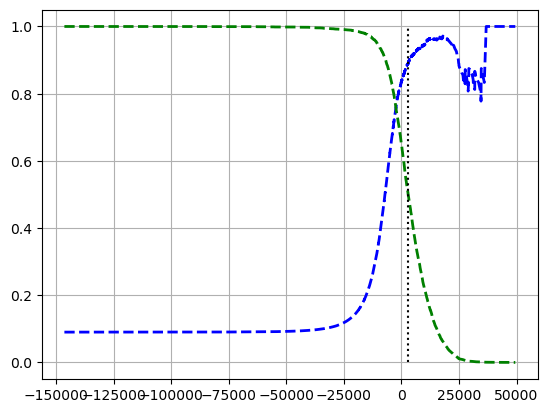

In [48]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", 
         linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall",
        linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.grid(True)
plt.show()

In [49]:
precisions[:-1] #keep everything but the last element

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [50]:
precisions[:-1].shape

(60000,)

In [51]:
recalls[:-1] #keep everything but the last element

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       5.53403431e-04, 3.68935621e-04, 1.84467810e-04])

In [52]:
thresholds.shape

(60000,)

In [53]:
recalls[:-1].shape

(60000,)

In [54]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [55]:
threshold

3000

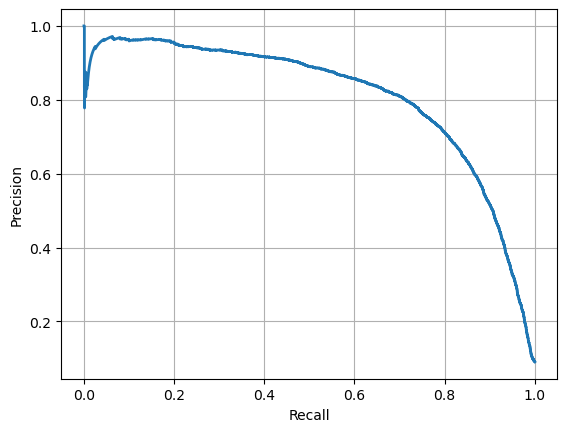

In [56]:
#NOTE

#You may wonder why the precision curve is bumpier than the recall curve 
#in Figure 3-5. The reason is that precision may sometimes go down when 
#you raise the threshold (although in general it will go up). To 
#understand why, look back at Figure 3-4 and notice what happens 
#when you start from the central threshold and move it just one 
#digit to the right: precision goes from 4/5 (80%) down to 3/4 (75%). 
#On the other hand, recall can only go down when the threshold is 
#increased, which explains why its curve looks smooth.

#At this threshold value (3000), precision is near 90% and recall is 
#around 50%. 

#Another way to select a good precision/recall trade-off 
#is to plot precision directly against recall, as shown in Figure 
#3-6 (the same threshold is shown):
    
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
    
    

In [57]:
#You can see that precision really starts to fall sharply at around 
#80% recall. You will probably want to select a precision/recall 
#trade-off just before that drop—for example, at around 60% recall. 
#But of course, the choice depends on your project.


#Suppose you decide to aim for 90% precision. You could use the 
#first plot to find the threshold you need to use, but that’s not 
#very precise. Alternatively, you can search for the lowest 
#threshold that gives you at least 90% precision. For this, 
#you can use the NumPy array’s argmax() method. This returns 
#the first index of the maximum value, which in this case means 
#the first True value:

idx_for_90_precision = (precisions >= 0.90).argmax()
idx_for_90_precision

57109

In [58]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.019499144183

In [59]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [60]:
#To make predictions (on the training set for now), instead of calling
#the classifier’s predict() method, you can run this code:

#this now compares scores obtained via decision function against new threshold
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [61]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [62]:
#Let’s check these predictions’ precision and recall:

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [63]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [64]:
#Great, you have a 90% precision classifier! As you can see, it is 
#fairly easy to create a classifier with virtually any precision you 
#want: just set a high enough threshold, and you’re done. But wait, 
#not so fast–a high-precision classifier is not very useful if 
#its recall is too low! For many applications, 48% recall wouldn’t 
#be great at all.


#If someone says, “Let’s reach 99% precision”, you 
#should ask, “At what recall?”

#The ROC Curve
#The receiver operating characteristic (ROC) curve is another common 
#tool used with binary classifiers. It is very similar to the 
#precision/recall curve, but instead of plotting precision versus 
#recall, the ROC curve plots the true positive rate (another name 
#for recall) against the false positive rate (FPR). The FPR 
#(also called the fall-out) is the ratio of negative instances that 
#are incorrectly classified as positive. It is equal to 1 – the true 
#negative rate (TNR), which is the ratio of negative instances that 
#are correctly classified as negative. The TNR is also called specificity.
#Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.
#To plot the ROC curve, you first use the roc_curve() function to 
#compute the TPR and FPR for various threshold values:


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [65]:
#Then you can plot the FPR against the TPR using Matplotlib. 
#The following code produces the plot in Figure 3-7. To find the point 
#that corresponds to 90% precision, we need to look for the index of 
#the desired threshold. Since thresholds are listed in decreasing order 
#in this case, we use <= instead of >= on the first line:


idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
idx_for_threshold_at_90

520

In [66]:
(thresholds <= threshold_for_90_precision)

array([False, False, False, ...,  True,  True,  True])

In [67]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [68]:
threshold_for_90_precision

3370.019499144183

In [69]:
fpr.shape

(3908,)

In [70]:
tpr.shape

(3908,)

In [71]:
tpr

array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [72]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [73]:
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]


tpr_90, fpr_90

(0.4799852425751706, 0.005295076861063779)

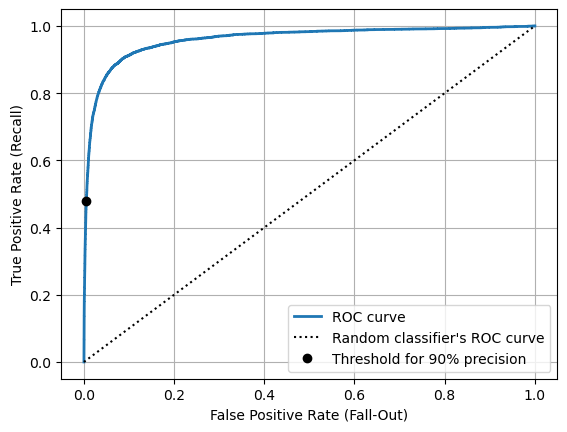

In [74]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1], [0,1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend()
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

In [75]:
#Once again there is a trade-off: the higher the recall (TPR), the more
#false positives (FPR) the classifier produces. The dotted line 
#represents the ROC curve of a purely random classifier; a good 
#classifier stays as far away from that line as possible (toward 
#the top-left corner).

#One way to compare classifiers is to measure the area under the 
#curve (AUC). A perfect classifier will have a ROC AUC equal to 1,
#whereas a purely random classifier will have a ROC AUC equal to 0.5.
#Scikit-Learn provides a function to estimate the ROC AUC:
    

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)
    
    

0.9604938554008616

In [76]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [77]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [78]:
#Since the ROC curve is so similar to the precision/recall (PR) curve,
#you may wonder how to decide which one to use. As a rule of thumb, you
#should prefer the PR curve whenever the positive class is rare or when
#you care more about the false positives than the false negatives. 
#Otherwise, use the ROC curve. For example, looking at the previous 
#ROC curve (and the ROC AUC score), you may think that the classifier 
#is really good. But this is mostly because there are few positives 
#(5s) compared to the negatives (non- 5s). In contrast, the PR curve 
#makes it clear that the classifier has room for improvement: the
#curve could really be closer to the top-right corner 

#Let’s now create a RandomForestClassifier, whose PR curve and F1 
#score we can compare to those of the SGDClassifier:

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)


In [79]:
#The precision_recall_curve() function expects labels and scores for
#each instance, so we need to train the random forest classifier and 
#make it assign a score to each instance. But the RandomForestClassifier
#class does not have a decision_function() method, due to the way it
#works (we will cover this in Chapter 7). Luckily, it has a 
#predict_proba() method that returns class probabilities for each 
#instance, and we can just use the probability of the positive class 
#as a score, so it will work fine.4 We can call the cross_val_predict() 
#function to train the RandomForestClassifier using cross-validation and
#make it predict class probabilities for every image as follows:


y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method="predict_proba")

#Let’s look at the class probabilities for the first two 
#images in the training set:

y_probas_forest[:2]

array([[0.11, 0.89],
       [0.98, 0.02]])

In [80]:
#The model predicts that the first image is positive with 89% 
#probability, and it predicts that the second image is negative 
#with 99% probability. Since each image is either positive or 
#negative, the probabilities in each row add up to 100%.

#These are estimated probabilities, not actual probabilities. For 
#example, if you look at all the images that the model classified 
#as positive with an estimated probability between 50% and 60%, 
#roughly 94% of them are actually positive. So, the model’s estimated 
#probabilities were much too low in this case—but models can be 
#overconfident as well. The sklearn.calibration package contains 
#tools to calibrate the estimated probabilities and make them much 
#closer to actual probabilities. See the extra material section in 
#this chapter’s notebook for more details.

In [81]:
y_probas_forest[:4]

array([[0.11, 0.89],
       [0.98, 0.02],
       [0.96, 0.04],
       [1.  , 0.  ]])

In [82]:
#The second column contains the estimated probabilities for the 
#positive class, so let’s pass them to the precision_recall_curve() 
#function:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5,
                                                                             y_scores_forest)
#Now we’re ready to plot the PR curve. It is useful to plot the first 
#PR curve as well to see how they compare (Figure 3-8):

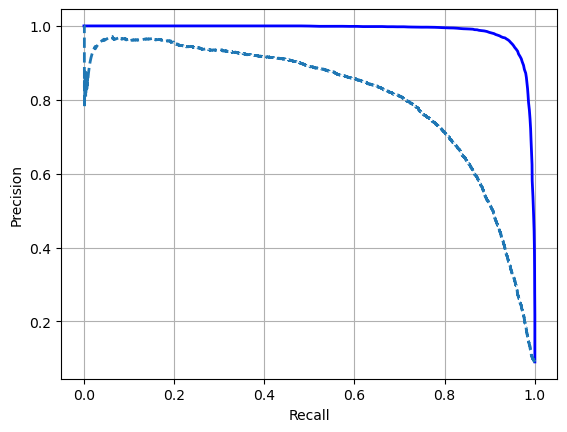

In [83]:
plt.plot(recalls_forest, precisions_forest, "b-", 
        linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [84]:
#As you can see in Figure 3-8, the RandomForestClassifier’s PR curve 
#looks much better than the SGDClassifier’s: it comes much closer to 
#the top-right corner. Its F1 score and ROC AUC score are also 
#significantly better:



y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
y_train_pred_forest


array([ True, False, False, ...,  True, False, False])

In [85]:
f1_score(y_train_5, y_train_pred_forest)

0.9270445185330457

In [86]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [87]:
y_train_pred_forest

array([ True, False, False, ...,  True, False, False])

In [88]:
roc_auc_score(y_train_5, y_scores_forest) #needs raw scores that determine
# what class for each instance. in this case raw scores are probabilities

0.9983296721818179

In [89]:
precision_score(y_train_5, y_train_pred_forest) #needs class labels

0.9895331798199707

In [90]:
recall_score(y_train_5, y_train_pred_forest)

0.8719793396052389

In [91]:
y_train_pred_forest

array([ True, False, False, ...,  True, False, False])

In [92]:
y_scores_forest

array([0.89, 0.02, 0.04, ..., 0.98, 0.08, 0.07])

In [93]:
#Multiclass Classification
#Whereas binary classifiers distinguish between two classes, 
#multiclass classifiers (also called multinomial classifiers) 
#can distinguish between more than two classes.



#Some Scikit-Learn classifiers (e.g., LogisticRegression, 
#RandomForestClassifier, and GaussianNB) are capable of handling 
#multiple classes natively. Others are strictly binary classifiers
#(e.g., SGDClassifier and SVC). However, there are various strategies 
#that you can use to perform multiclass classification with multiple
#binary classifiers. One way to create a system that can classify the
#digit images into 10 classes (from 0 to 9) is to train 10 binary
#classifiers, one for each digit (a 0-detector, a 1-detector, a 
#2-detector, and so on). Then when you want to classify an image, 
#you get the decision score from each classifier for that image and
#you select the class whose classifier outputs the highest score. 
#This is called the one-versus-the-rest (OvR) strategy, or sometimes
#one-versus-all (OvA).

#Another strategy is to train a binary classifier for every pair of 
#digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s,
#another for 1s and 2s, and so on. This is called the one-versus-one 
#(OvO) strategy. If there are N classes, you need to train 
#N × (N – 1) / 2 classifiers. For the MNIST problem, this means 
#training 45 binary classifiers! When you want to classify an image, 
#you have to run the image through all 45 classifiers and see which 
#class wins the most duels. The main advantage of OvO is that each 
#classifier only needs to be trained on the part of the training set
#containing the two classes that it must distinguish.

#Some algorithms (such as support vector machine classifiers) scale 
#poorly with the size of the training set. For these algorithms OvO 
#is preferred because it is faster to train many classifiers on small
#training sets than to train few classifiers on large training sets.
#For most binary classification algorithms, however, OvR is preferred.


#Scikit-Learn detects when you try to use a binary classification 
#algorithm for a multiclass classification task, and it automatically
#runs OvR or OvO, depending on the algorithm. Let’s try this with a 
#support vector machine classifier using the sklearn.svm.SVC class 
#(see Chapter 5). We’ll only train on the first 2,000 images, or else
#it will take a very long time:

#here I am importing and forcing OneVsOneClassifier just to confirm 
#that there are in total 45 different classifiers in OvO approach:

from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

svm_clf = OneVsOneClassifier(SVC(random_state=42))
svm_clf.fit(X_train[:2000], y_train[:2000]) #y_train, not y_train_5

OneVsOneClassifier(estimator=SVC(random_state=42))

In [94]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [95]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [96]:
#That was easy! We trained the SVC using the original target classes
#from 0 to 9 (y_train), instead of the 5-versus-the-rest target classes 
#(y_train_5). Since there are 10 classes (i.e., more than 2),
#Scikit-Learn used the OvO strategy and trained 45 binary classifiers.
#Now let’s make a prediction on an image:

svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [97]:
some_digit.shape

(784,)

In [98]:
#That’s correct! This code actually made 45 predictions—one per pair 
#of classes—and it selected the class that won the most duels. If you
#call the decision_function() method, you will see that it returns 
#10 scores per instance: one per class. Each class gets a score equal 
#to the number of won duels plus or minus a small tweak (max ±0.33) to
#break ties, based on the classifier scores:


some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.05,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.2 ,
         4.82]])

In [99]:
#The highest score is 9.3, and it’s indeed the one corresponding 
#to class 5:

In [100]:
class_id = some_digit_scores.argmax()
class_id

5

In [101]:
#When a classifier is trained, it stores the list of target classes
#in its classes_ attribute, ordered by value. In the case of MNIST, 
#the index of each class in the classes_ array conveniently matches 
#the class itself (e.g., the class at index 5 happens to be class '5'), 
#but in general you won’t be so lucky; you will need to look up the 
#class label like this:

svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [102]:
svm_clf.classes_[class_id]

'5'

In [103]:
len(svm_clf.estimators_)

45

In [104]:
#If you want to force Scikit-Learn to use one-versus-one or 
#one-versus-the- rest, you can use the OneVsOneClassifier or 
#OneVsRestClassifier classes. Simply create an instance and pass a 
#classifier to its constructor (it doesn’t even have to be a binary
#classifier). For example, this code creates a multiclass classifier
#using the OvR strategy, based on an SVC:


from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [105]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [106]:
len(ovr_clf.estimators_)

10

In [107]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [108]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [109]:
#Oops, that’s incorrect. Prediction errors do happen! This time 
#Scikit-Learn used the OvR strategy under the hood: since there are 
#10 classes, it trained 10 binary classifiers. The decision_function() 
#method now returns one value per class. Let’s look at the scores that 
#the SGD classifier assigned to each class:

sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [110]:
#You can see that the classifier is not very confident about 
#its prediction: almost all scores are very negative, while class 
#3 has a score of +1,824, and class 5 is not too far behind at –1,386. 
#Of course, you’ll want to evaluate this classifier on more than one 
#image. Since there are roughly the same number of images in each class, 
#the accuracy metric is fine. As usual, you can use 
#the cross_val_score() function to evaluate the model:

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [111]:
#It gets over 85.8% on all test folds. If you used a random classifier, 
#you would get 10% accuracy, so this is not such a bad score, but you 
#can still do much better. Simply scaling the inputs (as discussed in 
#Chapter 2) increases accuracy above 89.1%:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, 
                scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [112]:
#Error Analysis
#If this were a real project, you would now follow the steps in your 
#machine learning project checklist (see Appendix A). You’d explore 
#data preparation options, try out multiple models, shortlist the best
#ones, fine-tune their hyperparameters using GridSearchCV, and automate
#as much as possible. Here, we will assume that you have found a 
#promising model and you want to find ways to improve it. One way to 
#do this is to analyze the types of errors it makes.

#First, look at the confusion matrix. For this, you first need to 
#make predictions using the cross_val_predict() function; then you can 
#pass the labels and predictions to the confusion_matrix() function, 
#just like you did earlier. However, since there are now 10 classes 
#instead of 2, the confusion matrix will contain quite a lot of numbers,
#and it may be hard to read.
#A colored diagram of the confusion matrix is much easier to analyze. 
#To plot such a diagram, use the ConfusionMatrixDisplay.from_predictions()
#function like this:


from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled,
                                y_train, cv=3)    

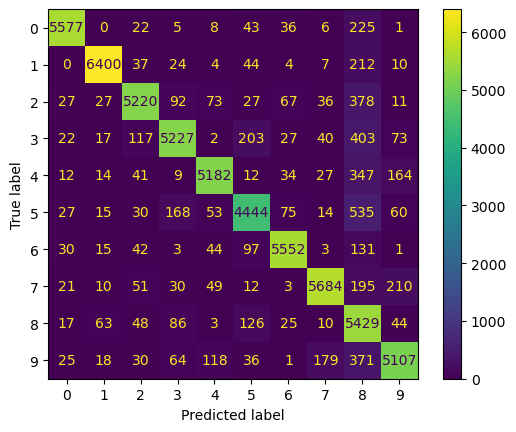

In [117]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

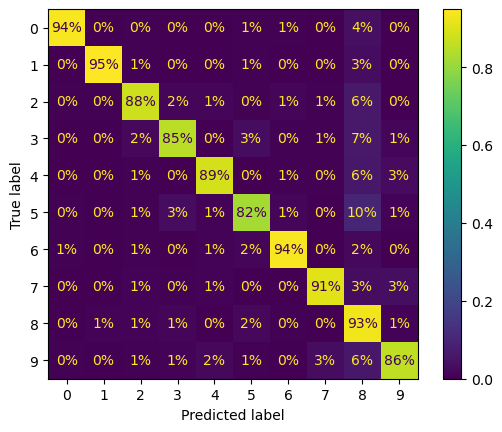

In [119]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true",
                                       values_format=".0%")
plt.show()

In [120]:
sample_weight = (y_train_pred != y_train)

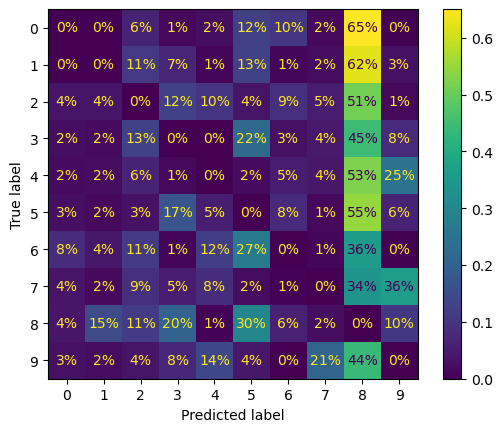

In [122]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                       sample_weight=sample_weight,
                                       normalize="true", values_format=".0%")
plt.show()


#Now you can see much more clearly the kinds of errors the classifier makes. 
#The column for class 8 is now really bright, which confirms that many images 
#got misclassified as 8s. In fact this is the most common misclassification for 
#almost all classes. But be careful how you interpret the percentages in this 
#diagram: remember that we’ve excluded the correct predictions. For example, 
#the 36% in row #7, column #9 does not mean that 36% of all images of 7s were 
#misclassified as 9s. It means that 36% of the errors the model made on images 
#of 7s were misclassifications as 9s. In reality, only 3% of images of 7s were 
#misclassified as 9s, as you can see in the diagram on the right in Figure 3-9.


In [129]:
#Multilabel Classification
#Until now, each instance has always been assigned to just one class. But 
#in some cases you may want your classifier to output multiple classes for 
#each instance. Consider a face-recognition classifier: what should it do if 
#it recognizes several people in the same picture? It should attach one tag 
#per person it recognizes. Say the classifier has been trained to recognize 
#three faces: Alice, Bob, and Charlie. Then when the classifier is shown a 
#picture of Alice and Charlie, it should output [True, False, True] (meaning 
#“Alice yes, Bob no, Charlie yes”). Such a classification system that outputs 
#multiple binary tags is called a multilabel classification system.
        
#We won’t go into face recognition just yet, but let’s look at a simpler example, 
#just for illustration purposes:


import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

#This code creates a y_multilabel array containing two target labels for each digit 
#image: the first indicates whether or not the digit is large (7, 8, or 9), and the 
#second indicates whether or not it is odd. Then the code creates a KNeighborsClassifier 
#instance, which supports multilabel classification (not all classifiers do), and 
#trains this model using the multiple targets array. Now you can make a prediction, 
#and notice that it outputs two labels:

knn_clf.predict([some_digit])

#And it gets it right! The digit 5 is indeed not large (False) and odd (True).

array([[False,  True]])

In [130]:
#There are many ways to evaluate a multilabel classifier, and selecting the right 
#metric really depends on your project. One approach is to measure the F1 score 
#for each individual label (or any other binary classifier metric discussed earlier), 
#then simply compute the average score. The following code computes the average F1 
#score across all labels:


y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)


In [131]:
y_train_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [133]:
#This approach assumes that all labels are equally important, which may not be the case. 
#In particular, if you have many more pictures of Alice than of Bob or Charlie, you may 
#want to give more weight to the classifier’s score on pictures of Alice. One simple option
#is to give each label a weight equal to its support (i.e., the number of instances with 
#that target label). To do this, simply set average="weighted" when calling the f1_score() 
#function

f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [135]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [136]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [138]:
#Multioutput Classification
#The last type of classification task we’ll discuss here is called multioutput– multiclass 
#classification (or just multioutput classification). It is a generalization of multilabel 
#classification where each label can be multiclass (i.e., it can have more than two possible
#values). To illustrate this, let’s build a system that removes noise from images. It will
#take as input a noisy digit image, and it will (hopefully) output a clean digit image, 
#represented as an array of pixel intensities, just like the MNIST images. Notice that 
#the classifier’s output is multilabel (one label per pixel) and each label can have 
#multiple values (pixel intensity ranges from 0 to 255). This is thus an example of 
#a multioutput classification system.

#NOTE
#The line between classification and regression is sometimes blurry, such as in this example.
#Arguably, predicting pixel intensity is more akin to regression than to classification.
#Moreover, multioutput systems are not limited to classification tasks; you could even
#have a system that outputs multiple labels per instance, including both class labels and 
#value labels.


#Let’s start by creating the training and test sets by taking the MNIST images and 
#adding noise to their pixel intensities with NumPy’s randint() function. The target 
#images will be the original images:


np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
noise

array([[51, 92, 14, ..., 46, 24, 65],
       [ 9, 55, 29, ..., 11, 14, 58],
       [25, 25, 46, ..., 92, 25, 24],
       ...,
       [26, 20, 41, ..., 81, 92, 91],
       [51, 55, 70, ..., 28, 29, 27],
       [ 1,  0, 63, ..., 14,  5,  4]])

In [143]:
X_train_mod = X_train + noise
X_train_mod

array([[51., 92., 14., ..., 46., 24., 65.],
       [ 9., 55., 29., ..., 11., 14., 58.],
       [25., 25., 46., ..., 92., 25., 24.],
       ...,
       [26., 20., 41., ..., 81., 92., 91.],
       [51., 55., 70., ..., 28., 29., 27.],
       [ 1.,  0., 63., ..., 14.,  5.,  4.]])

In [145]:
noise = np.random.randint(0, 100, (len(X_test), 784)) #len(X_test) = 10000
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test 

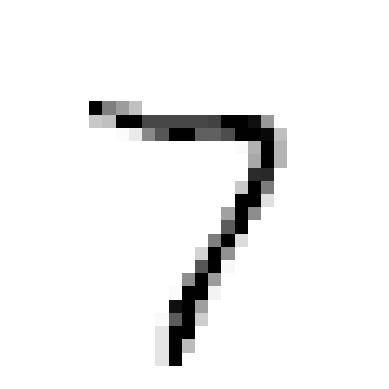

In [146]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

In [149]:
X_test_mod[0].shape

(784,)

In [ ]:
#Looks close enough to the target! This concludes our tour of classification. 
#You now know how to select good metrics for classification tasks, pick the 
#appropriate precision/recall trade-off, compare classifiers, and more generally 
#build good classification systems for a variety of tasks. In the next chapters, 
#you’ll learn how all these machine learning models you’ve been using actually work.


